In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Collection:-

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anand3415/FlaskAPI/main/adult.data", header=None, names=['Age','Workclass','fnlwgt','Education','Edu_Num','Maritial Status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours per week','native country','Income'])

In [ ]:
df.head()

,Age,Workclass,fnlwgt,Education,Edu_Num,Maritial Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours per week,native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Edu_Num          32561 non-null  int64 
 5   Maritial Status  32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital_gain     32561 non-null  int64 
 11  Capital_loss     32561 non-null  int64 
 12  Hours per week   32561 non-null  int64 
 13  native country   32561 non-null  object
 14  Income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.shape

(32561, 15)

## Data Cleaning:-

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [ ]:
df.duplicated().sum()

24

In [ ]:
df = df.drop_duplicates() # There are 24 duplicate values so we have deleted the duplicates.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['native country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df['native country'] = df['native country'].str.replace("?", "Unknown")

<ipython-input-24-a5274351793a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['native country'] = df['native country'].str.replace("?", "Unknown")


In [ ]:
df['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
df['Occupation'] = df['Occupation'].str.replace("?","Other")

<ipython-input-26-2b7f4d0ab5ec>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Occupation'] = df['Occupation'].str.replace("?","Other")


In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [ ]:
numeric_features

['Age', 'fnlwgt', 'Edu_Num', 'Capital_gain', 'Capital_loss', 'Hours per week']

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [ ]:
categorical_features

['Workclass',
 'Education',
 'Maritial Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'native country',
 'Income']

In [ ]:
for col in categorical_features:
    print(df[col].value_counts())
    print("=============================================")

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Maritial Status, dtype: int64
 Prof-specialty       4136
 Craft-repair         4094
 Exec-manageria

## Data Visualization:-

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

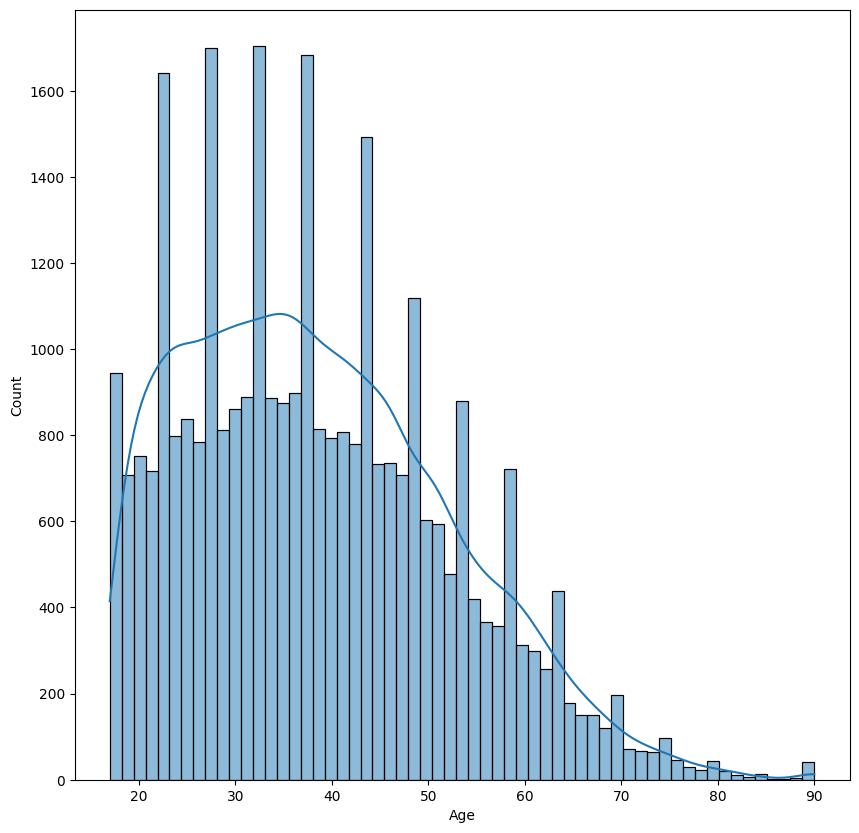

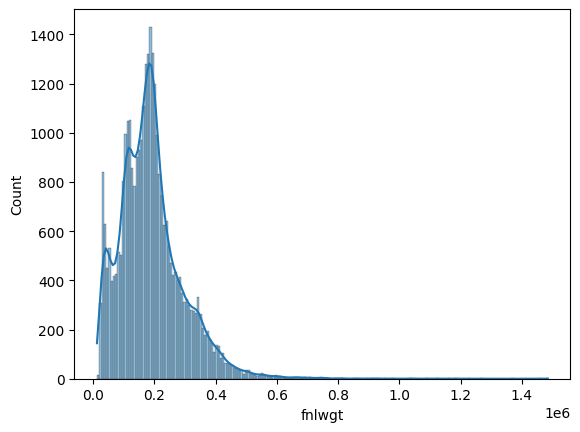

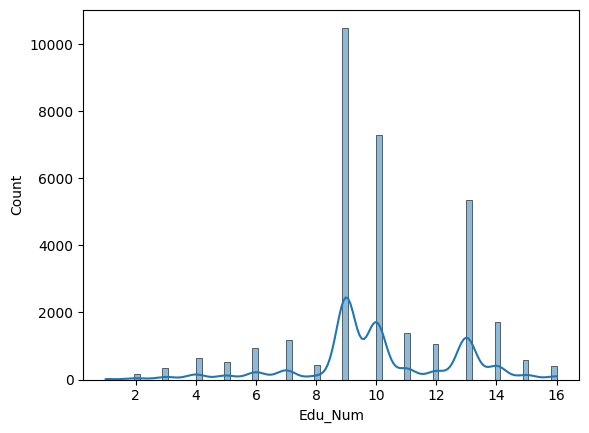

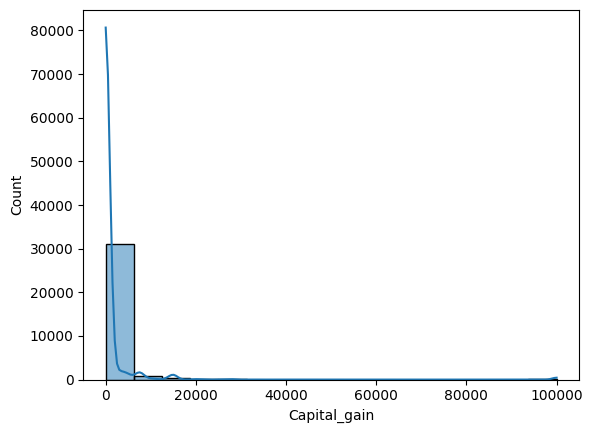

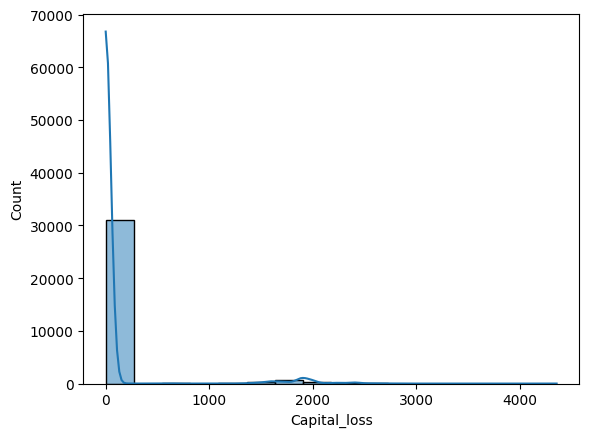

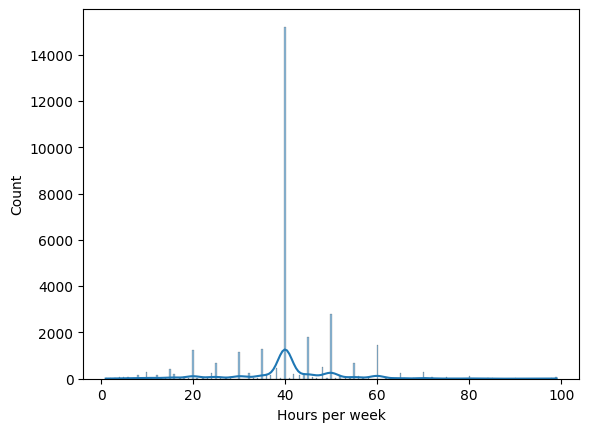

In [ ]:
plt.figure(figsize =(10,10))
x=1
for i in numeric_features:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

<Axes: xlabel='Workclass', ylabel='count'>

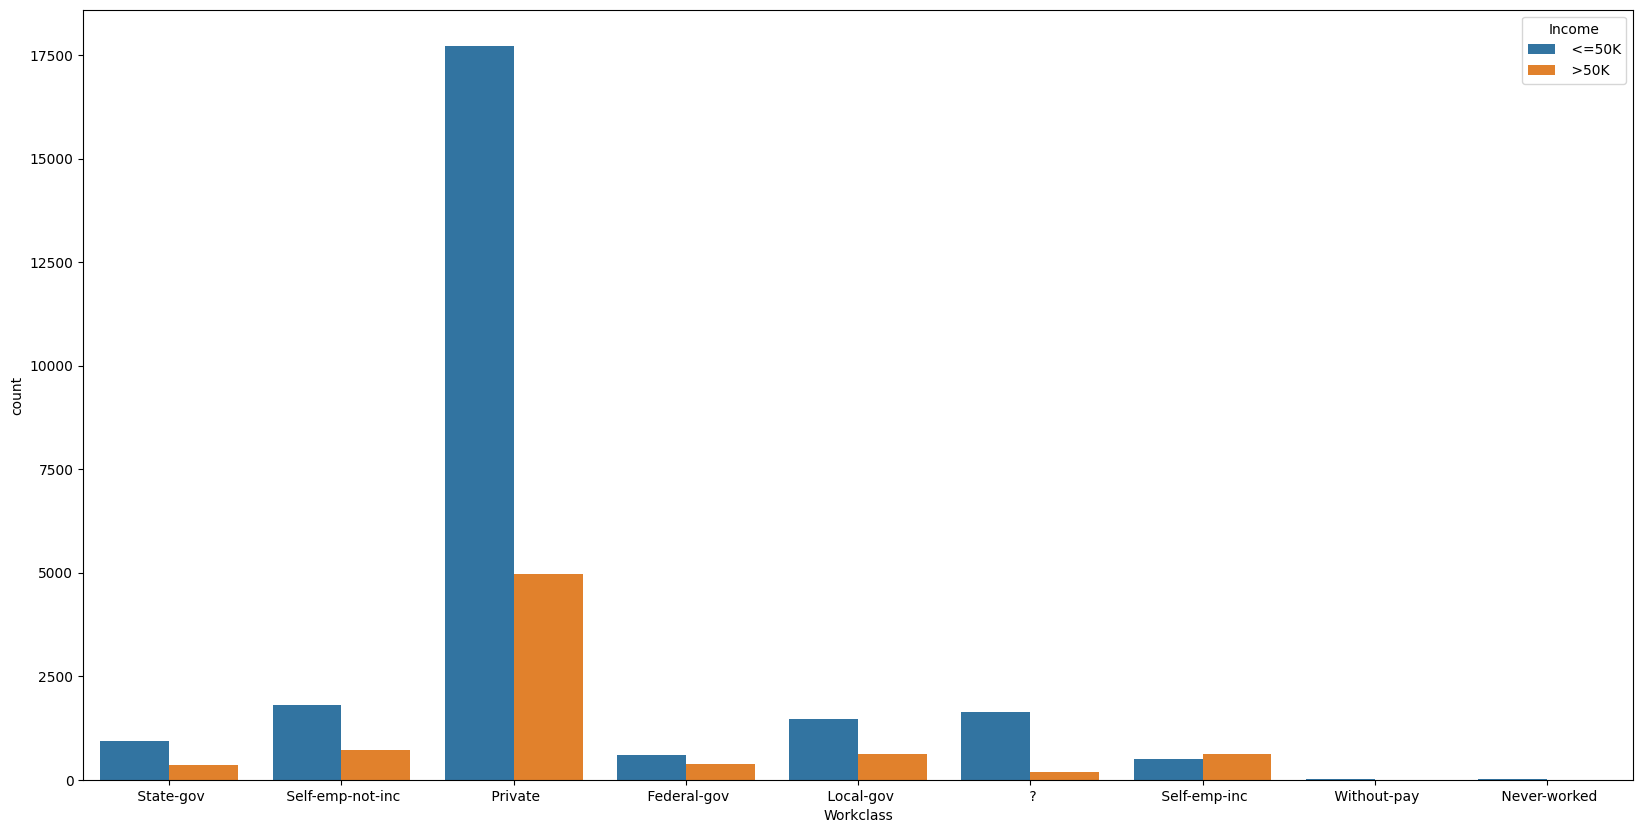

In [ ]:
# For categorical features:- ['Workclass', 'Education', 'Maritial Status', 'Occupation', 'Relationship', 'Race', 'Sex','native country', 'Income']
plt.figure(figsize =(20,10))
sns.countplot(data=df,x= 'Workclass',hue='Income')

### Here from this plot we can conclude that Private employees are more in numbers and they earn more than 50k. 

<Axes: xlabel='Education', ylabel='count'>

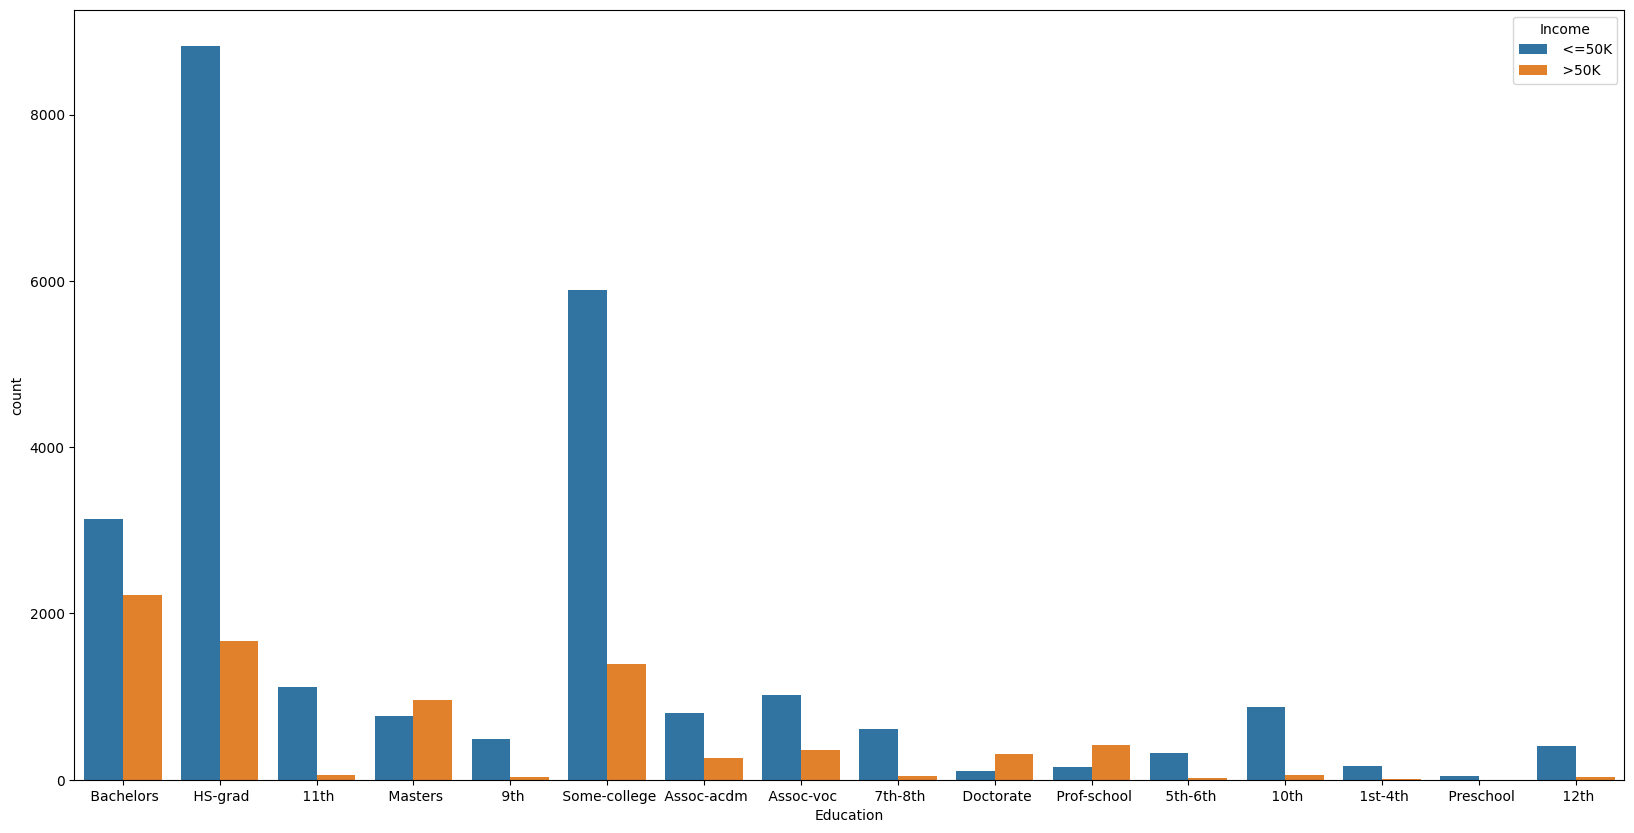

In [ ]:
plt.figure(figsize =(20,10))
sns.countplot(data=df,x= 'Education',hue='Income')

### Here from this plot we can conclude that persons from High school graduates are highest and they are earning more than 50k.

<Axes: xlabel='Maritial Status', ylabel='count'>

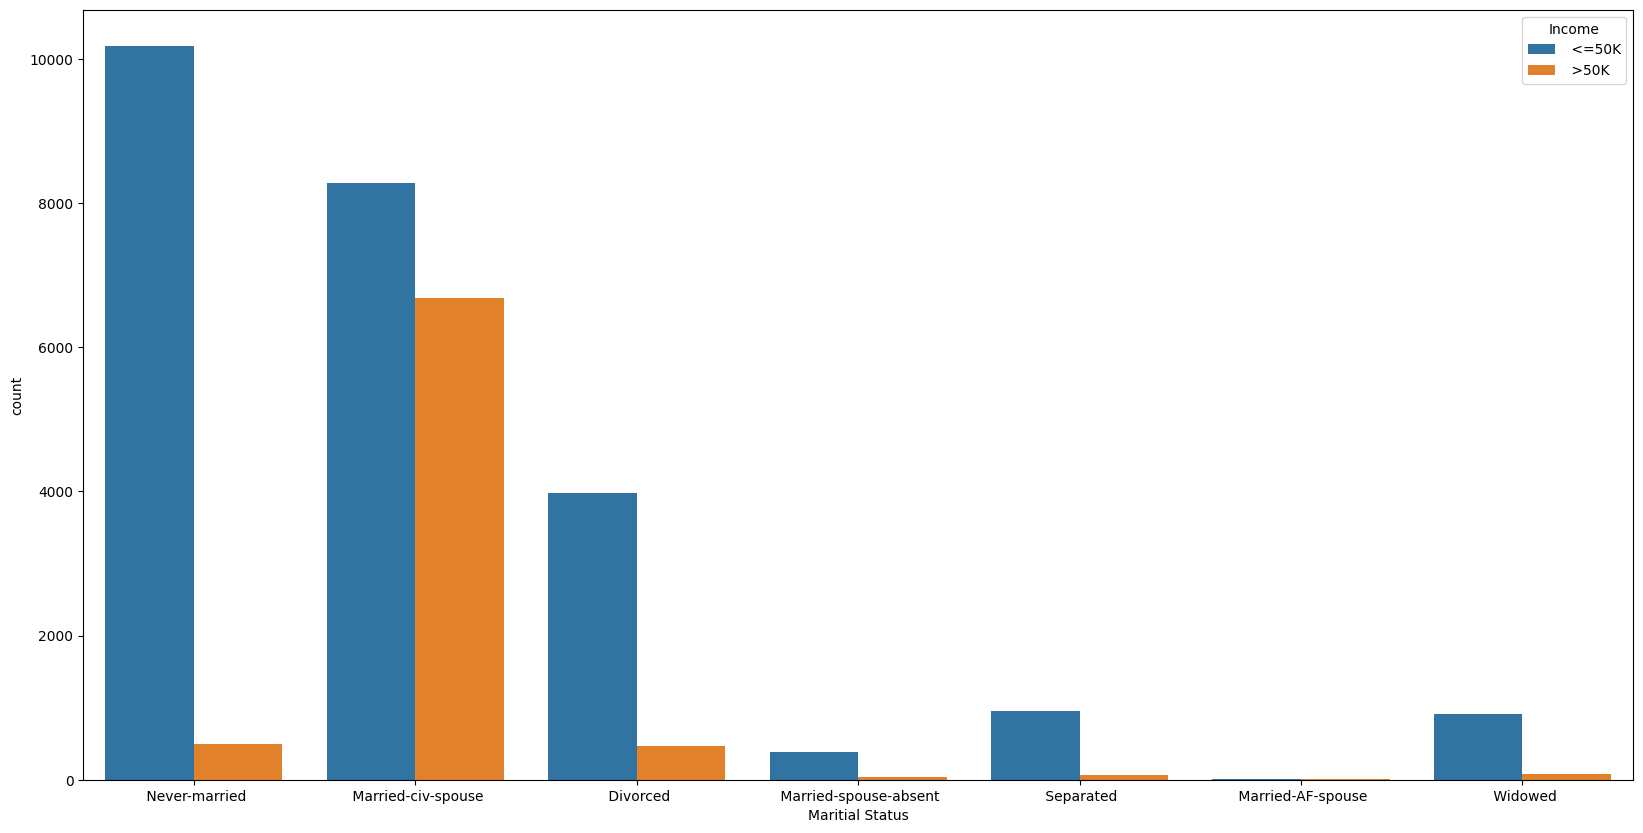

In [ ]:
plt.figure(figsize =(20,10))
sns.countplot(data=df,x= 'Maritial Status',hue='Income')

### Here we concluded that Singles are more in numbers who are earning more than 50k.

<Axes: xlabel='Occupation', ylabel='count'>

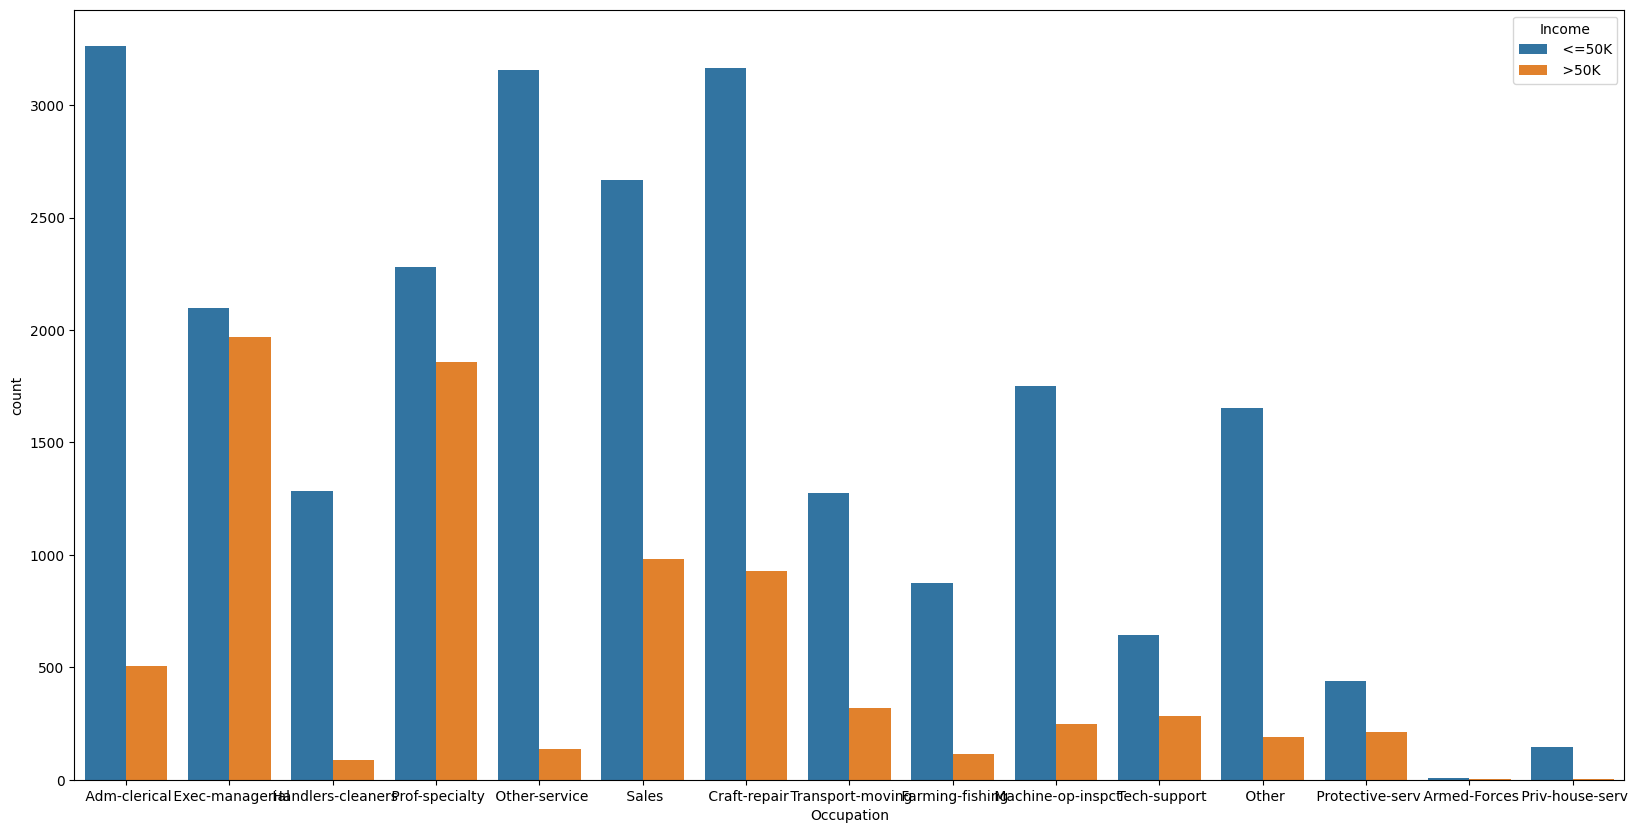

In [ ]:
plt.figure(figsize =(20,10))
sns.countplot(data=df,x= 'Occupation',hue='Income')

<Axes: xlabel='Relationship', ylabel='count'>

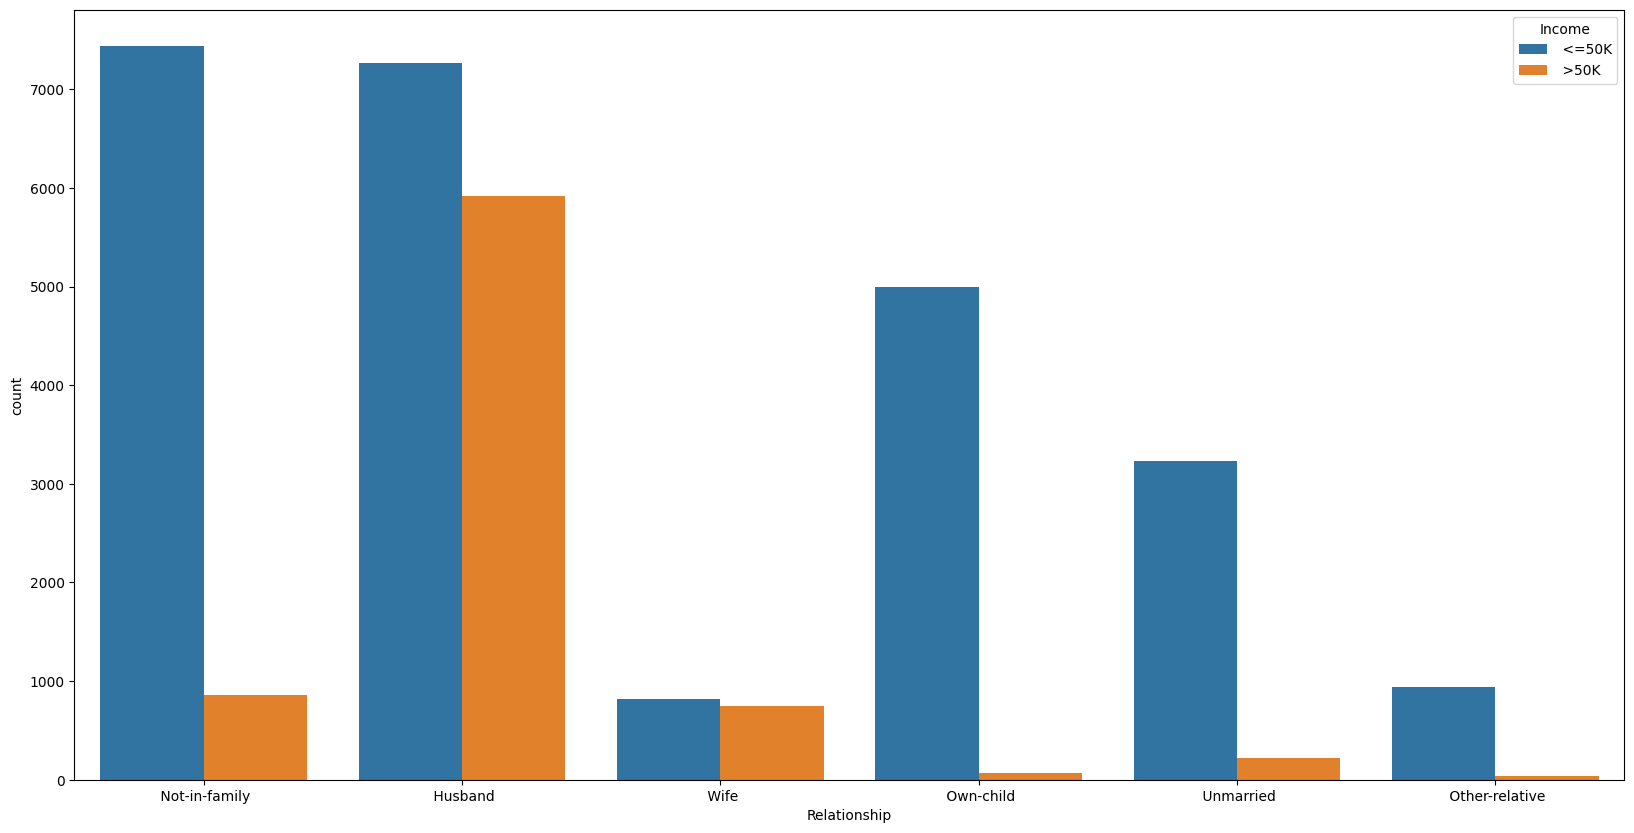

In [ ]:
plt.figure(figsize =(20,10))
sns.countplot(data=df,x= 'Relationship',hue='Income')

<Axes: xlabel='Race', ylabel='count'>

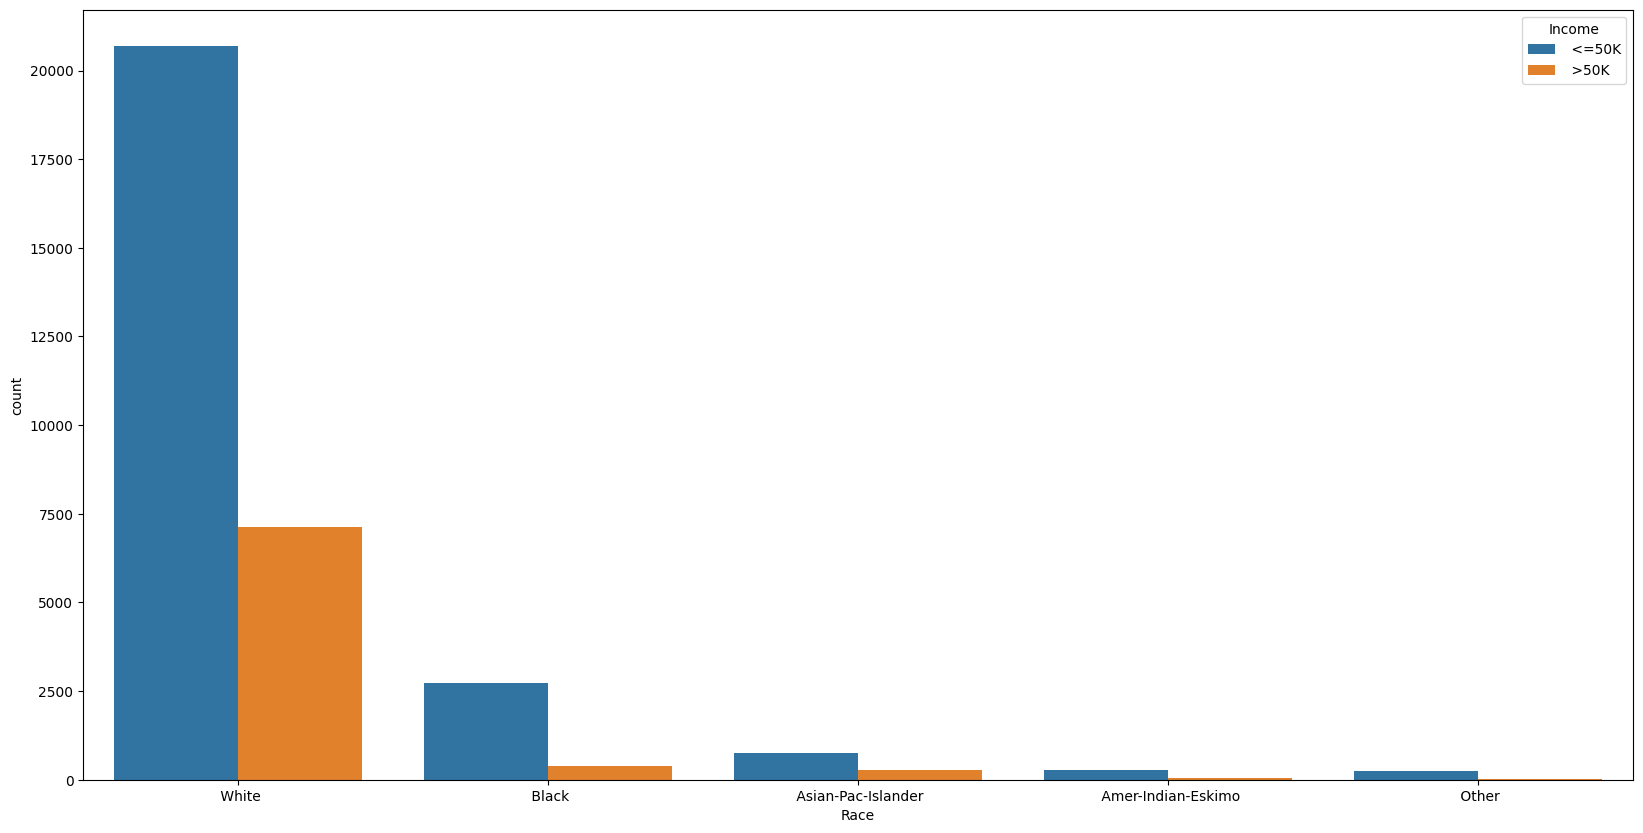

In [ ]:
plt.figure(figsize =(20,10))
sns.countplot(data=df,x= 'Race',hue='Income')

<Axes: xlabel='Sex', ylabel='count'>

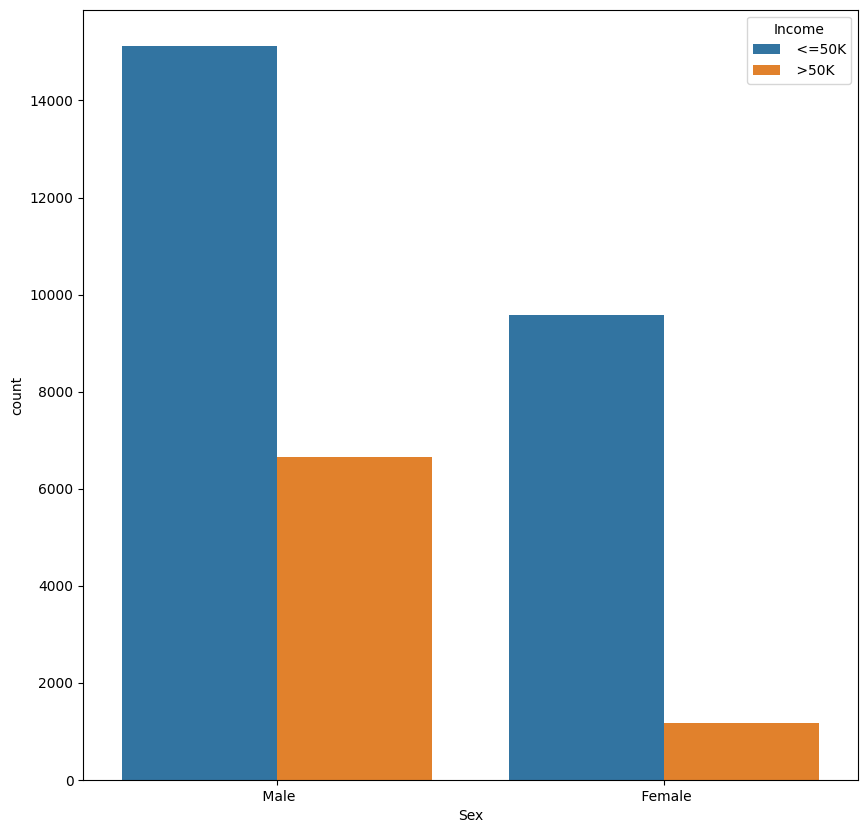

In [ ]:
plt.figure(figsize =(10,10))
sns.countplot(data=df,x= 'Sex',hue='Income')

<Axes: xlabel='native country', ylabel='count'>

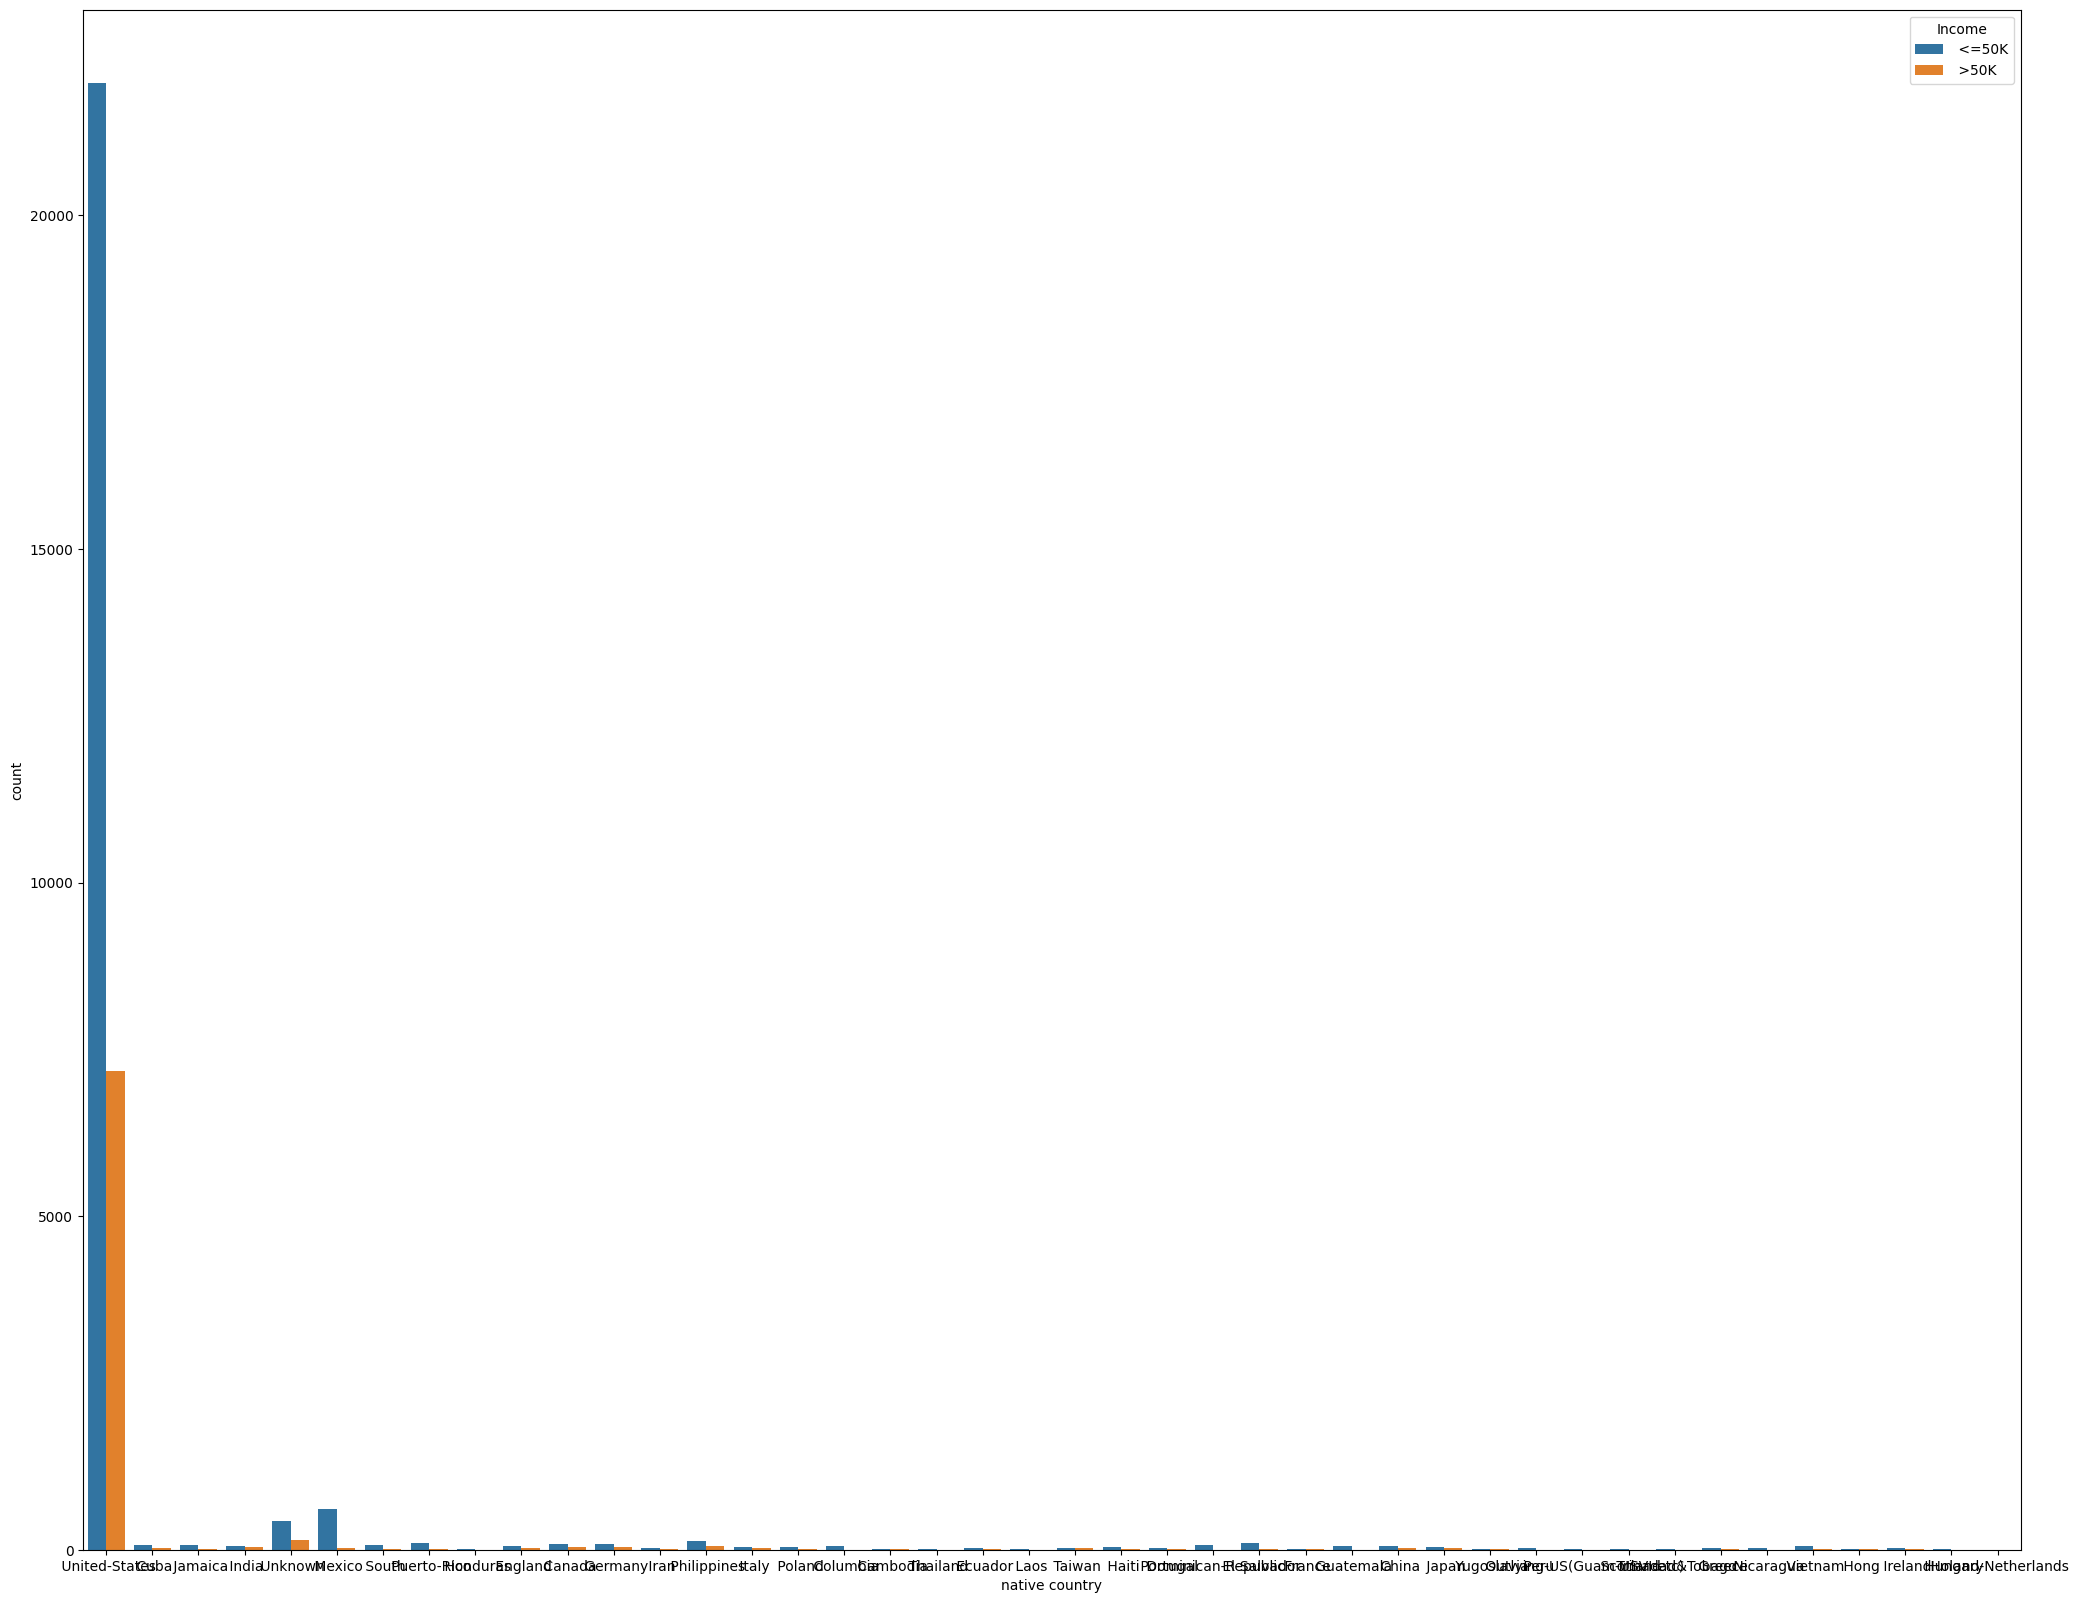

In [ ]:
plt.figure(figsize =(25,20))
sns.countplot(data=df,x= 'native country',hue='Income')

<Axes: >

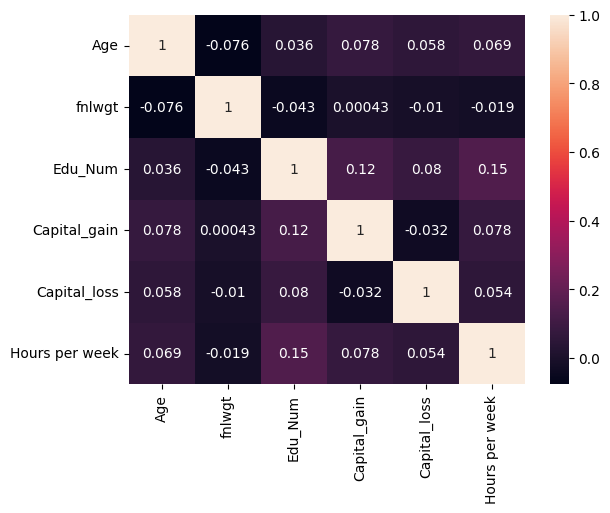

In [ ]:
# Correlation using heatmap:-
sns.heatmap(df[numeric_features].corr(),annot=True)

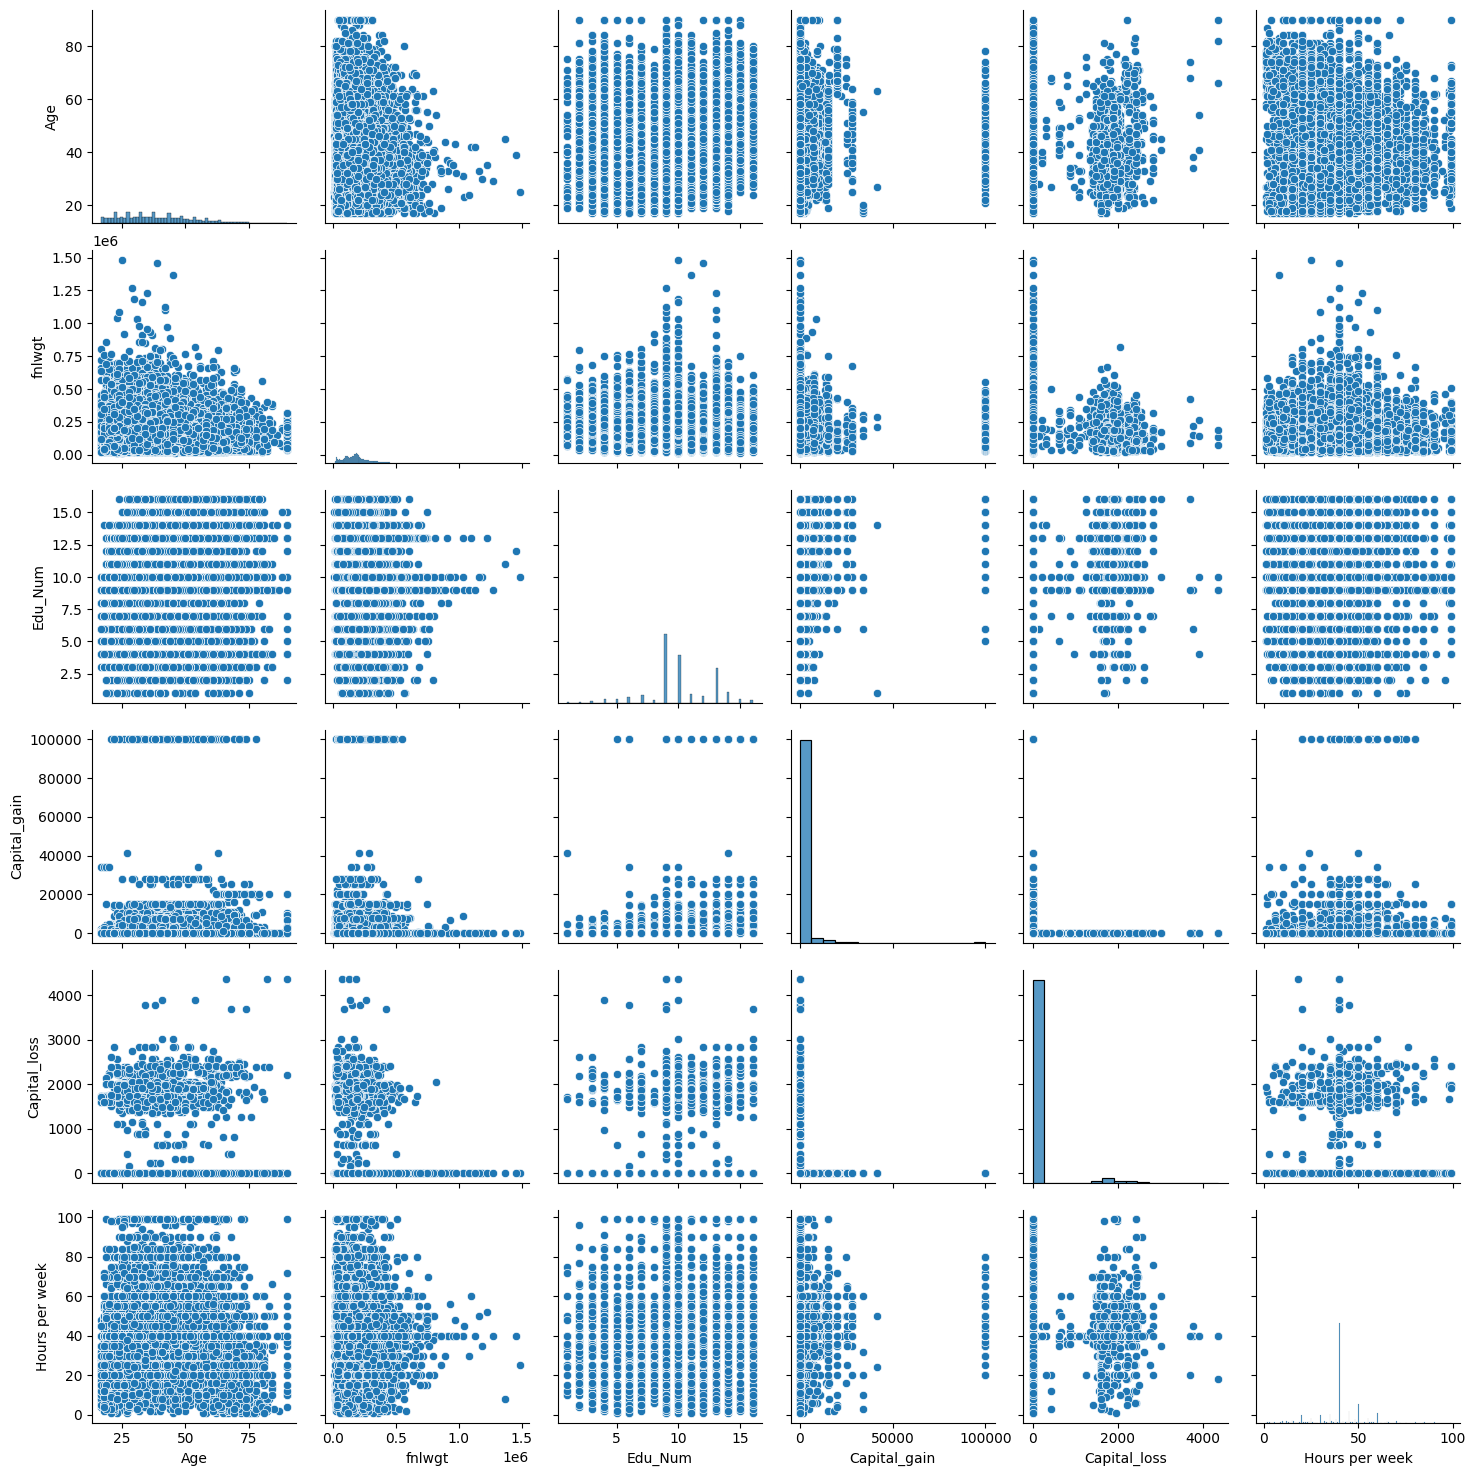

In [ ]:
sns.pairplot(df)

## Divide the dataset into independent and dependent features:-

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x.head(2)

,Age,Workclass,fnlwgt,Education,Edu_Num,Maritial Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours per week,native country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [ ]:
y.head(2)

0     <=50K
1     <=50K
Name: Income, dtype: object

In [ ]:
x.head()

,Age,Workclass,fnlwgt,Education,Edu_Num,Maritial Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours per week,native country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Income, dtype: object

### Feature Engineering:-


In [ ]:
# Which feature to be ordinal encoded and which is to be scaled:-
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [ ]:
categorical_cols

Index(['Workclass', 'Education', 'Maritial Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'native country'],
      dtype='object')

In [ ]:
numerical_cols

Index(['Age', 'fnlwgt', 'Edu_Num', 'Capital_gain', 'Capital_loss',
       'Hours per week'],
      dtype='object')

In [ ]:
df['native country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Unknown',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
# Custom Rankings for each variable in Categorical columns:-
Workclass_categories = [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']
Education_categories = [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']
Maritial_categories = [' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
Occupation_categories = [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' Other', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']
Relationship_categories = [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative']
Race_categories = [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']
Sex_categories = [' Male', ' Female']
native_categories = [' United-States', ' Cuba', ' Jamaica', ' India', ' Unknown',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands']


In [ ]:
## Using SimpleImputer to handle missing values:-
from sklearn.impute import SimpleImputer

In [ ]:
## Using StandardScaler for feature scaling:-
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
## Numerical Pipeline:
num_pipeline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler()),

        
    ]
)

## Categorical Pipeline:
cat_pipeline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories = [Workclass_categories,Education_categories,Maritial_categories,Occupation_categories,Relationship_categories,Race_categories,Sex_categories,native_categories])),
        ('scaler',StandardScaler())
    ]
)
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [ ]:
# Train Test Split:-
x

,Age,Workclass,fnlwgt,Education,Edu_Num,Maritial Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours per week,native country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [ ]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32537, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42) 

In [ ]:
X_train= pd.DataFrame(preprocessor.fit_transform(X_train))
X_test = pd.DataFrame(preprocessor.transform(X_test))


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.693443,0.503319,-0.033365,0.917418,-0.219029,-0.033058,-1.067560,0.462924,-0.068182,0.392825,-0.385795,4.38077,-0.705943,-0.258126
1,-0.555208,0.481795,1.135080,-0.142880,-0.219029,-0.033058,-0.253958,-0.991175,-0.862070,0.097597,-1.078844,-0.35442,-0.705943,-0.258126
2,0.840343,-1.391011,2.303525,1.929169,-0.219029,0.777388,-0.253958,1.626203,-0.068182,-0.492859,-0.385795,-0.35442,-0.705943,-0.258126
3,-1.216259,-0.006054,-0.422846,-0.142880,-0.219029,0.372165,-0.253958,-0.700355,-0.068182,0.097597,-0.385795,-0.35442,-0.705943,-0.258126
4,-0.775558,-0.787768,-0.422846,-0.142880,-0.219029,0.372165,-0.253958,-0.700355,-0.862070,-1.083316,-1.078844,-0.35442,1.416545,-0.258126


In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.555208,-1.490113,0.356117,-0.14288,-0.219029,-0.033058,-1.881163,1.044564,-0.068182,0.392825,-0.385795,-0.354420,-0.705943,-0.258126
1,-1.069359,-0.568609,1.135080,-0.14288,-0.219029,-0.033058,0.559644,-0.991175,-0.862070,-1.083316,-1.078844,-0.354420,-0.705943,-0.258126
2,1.574844,-0.873647,-0.033365,-0.14288,-0.219029,1.587834,1.373246,0.462924,-0.068182,-0.197631,-0.385795,2.802373,-0.705943,2.297971
3,-0.555208,1.975786,-0.033365,-0.14288,-0.219029,-0.033058,-0.253958,0.462924,-0.862070,-1.083316,-1.078844,-0.354420,-0.705943,-0.258126
4,0.326192,-0.433605,1.135080,-0.14288,-0.219029,-0.033058,0.559644,-0.991175,-0.862070,-1.083316,-1.078844,-0.354420,-0.705943,-0.258126


### In this step we have converted the categorical columns into numerical columns doing the standard scaling and using ordinal encoder.

## Model Training:-

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Testing of accuracy:-
accuracy_score(y_test,y_pred)

0.8274943659086252

In [ ]:
# Training accuracy:-
model.score(X_train,y_train)

0.8253347969264544

In [ ]:
# Metrics Evaluation:-
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [ ]:
f1_score(y_test,y_pred,average=None)

array([0.89262943, 0.56145833])

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       <=50K       0.85      0.95      0.89      7405\n        >50K       0.73      0.46      0.56      2357\n\n    accuracy                           0.83      9762\n   macro avg       0.79      0.70      0.73      9762\nweighted avg       0.82      0.83      0.81      9762\n'

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7000,  405],
       [1279, 1078]])

**From Confusion matrix, we concluded that: **



*   There are 7000 samples which are correctly predicted which belongs to class 0 and also predicted as class 0 (True Negatives).
*   There are 405 samples which are incorrectly predicted which belongs to class 1 but predicted as class 0 (False Negatives).
*   There are 1279 samples which are incorrectly predicted which belongs to class 0 but predicted as class 1 (False Positive).
*   There are 1078 samples which are correctly predicted which belongs to class 1 and were predicted as class 1 (True Positive).





## Hyper Parameter Tuning:-


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
para = {'C': [1,2,5,10,20,30,45,55]}
regression_log=GridSearchCV(logistic,para,scoring='accuracy',cv=5)

In [ ]:
regression_log.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 10, 20, 30, 45, 55]},
             scoring='accuracy')

In [ ]:
print(regression_log.best_params_)

{'C': 10}


In [ ]:
print(regression_log.best_score_)

0.8255982436882547
